In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd

%matplotlib inline

plt.style.use('default') 
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid")

pd.options.display.float_format = '{:20,.2f}'.format

import warnings
warnings.filterwarnings('ignore')


In [13]:
url_train_labels = 'https://raw.githubusercontent.com/Tyavicoli/pandas/main/train_labels.csv'
url_train_values ='https://raw.githubusercontent.com/Tyavicoli/pandas/main/train_values.csv'
df = pd.read_csv(url_train_labels,nrows=0)
columnas = df.columns.to_list()
datatypes = {
    **{columnas[0]:np.int32}\
    , **{column:np.int16 for column in columnas[1:8] + columnas[27:28]}\
    , **{column:'category' for column in columnas[8:15] + columnas[26:27]}\
    , **{column:np.bool for column in columnas[15:26] + columnas[28:39]}
}
edificios = pd.read_csv(url_train_values,dtype=datatypes)
daños = pd.read_csv(url_train_labels,dtype={'building_id':np.int32,'damage_grade':'category'})


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   building_id   260601 non-null  int32   
 1   damage_grade  260601 non-null  category
dtypes: category(1), int32(1)
memory usage: 1.2 MB


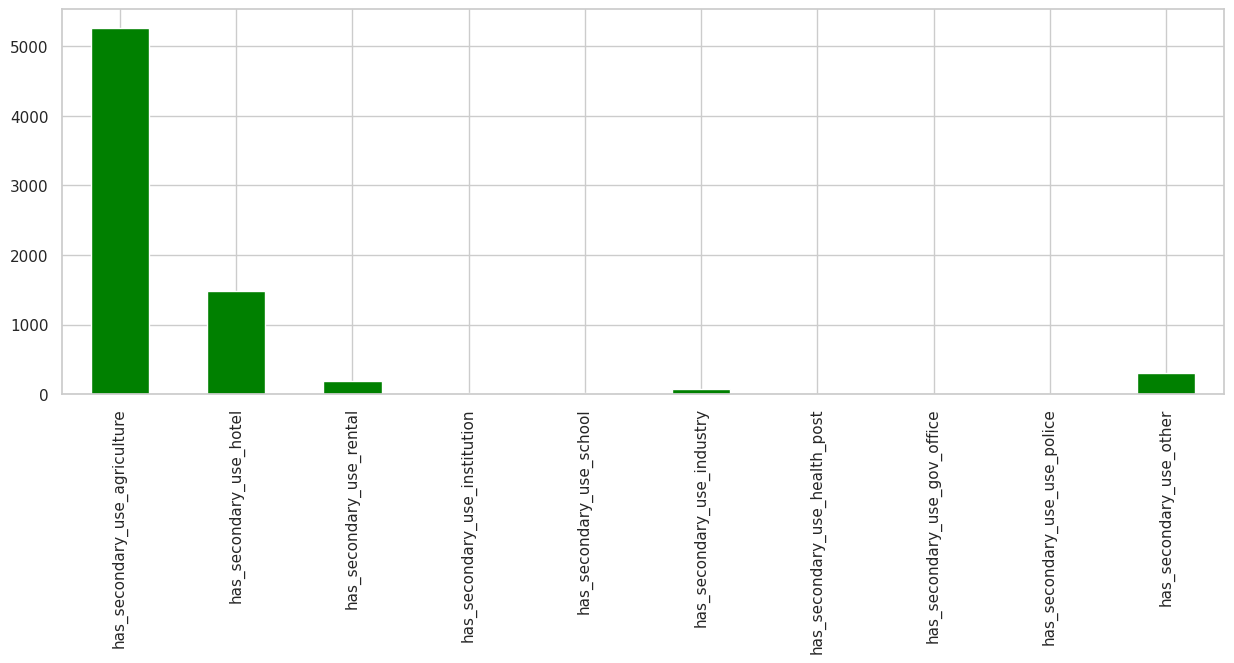

In [44]:
df_entero = edificios.merge(daños, left_on = 'building_id', right_on = 'building_id')
edificios_daño_3 = df_entero.loc[df_entero['damage_grade'] == '3', :]
edificios_daño_3_por_sector = edificios_daño_3.groupby('damage_grade').sum().reset_index()
edificios_daño_3_por_sector.iloc[2,22:].plot(kind='bar',color='green',figsize=(15,5))

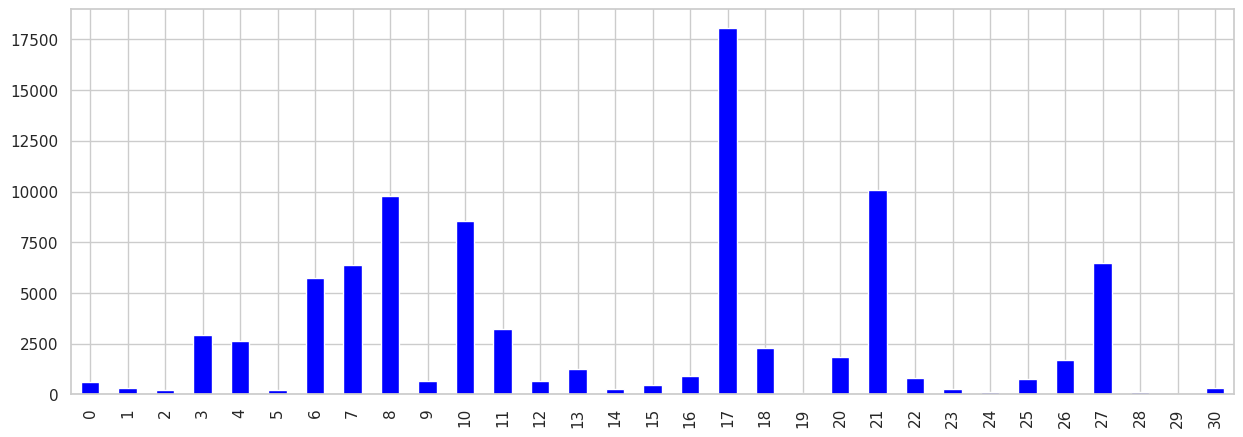

In [60]:
edificios_zona_geo_1 = edificios_daño_3.groupby('geo_level_1_id').sum().reset_index()
edificios_zona_geo_1['count_families'].plot(kind='bar',color='blue',figsize=(15,5))

In [99]:
edificios_por_daño_cimiento = df_entero.groupby(['foundation_type','damage_grade']).count().reset_index()
#edificios_por_daño_cimiento['building_id'].plot(kind='bar',color='blue',figsize=(15,5))
edificios_por_daño_cimiento = edificios_por_daño_cimiento.iloc[:,:3]
edificios_por_daño_cimiento.head()

,foundation_type,damage_grade,building_id
0,h,1,358
1,h,2,579
2,h,3,511
3,i,1,6004
4,i,2,4354
5,i,3,221
6,r,1,10720
7,r,2,125515
8,r,3,82961
9,u,1,3689
